In [1]:
# パッケージの読み込み
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNISTデータセットの読み込み
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/")


Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


7


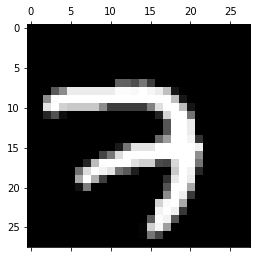

In [3]:
print(mnist.train.labels[0])

plt.gray()  # グレースケールのカラーマップを使う
plt.matshow(mnist.train.images[0].reshape(28, 28))

In [4]:
from tensorflow.contrib.learn.python import SKCompat

# 特徴量の数を定義
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=28 * 28)]

# 隠れ層3つ
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=10,
                                            model_dir="./dnnmnist/")
# scikit-learnライクSKCompatに変換
classifier = SKCompat(classifier)

# 学習
classifier.fit(x=mnist.train.images, y=mnist.train.labels.astype(
    np.int32), steps=20000, batch_size=50)

# テスト用データで正解率算出
classifier.score(mnist.test.images, mnist.test.labels.astype(np.int32))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x101daafd0>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./dnnmnist/model.ckpt.


INFO:tensorflow:global_step/sec: 398.072
INFO:tensorflow:loss = 0.446243, step = 8201
INFO:tensorflow:global_step/sec: 460.483
INFO:tensorflow:loss = 0.353229, step = 8301
INFO:tensorflow:global_step/sec: 618.946
INFO:tensorflow:loss = 0.164178, step = 8401
INFO:tensorflow:global_step/sec: 639.006
INFO:tensorflow:loss = 0.113141, step = 8501
INFO:tensorflow:global_step/sec: 662.419
INFO:tensorflow:loss = 0.1327, step = 8601
INFO:tensorflow:global_step/sec: 624.235
INFO:tensorflow:loss = 0.253167, step = 8701
INFO:tensorflow:global_step/sec: 644.612
INFO:tensorflow:loss = 0.34186, step = 8801
INFO:tensorflow:global_step/sec: 675.22
INFO:tensorflow:loss = 0.190688, step = 8901
INFO:tensorflow:global_step/sec: 667.583
INFO:tensorflow:loss = 0.274336, step = 9001
INFO:tensorflow:global_step/sec: 645.862
INFO:tensorflow:loss = 0.165493, step = 9101
INFO:tensorflow:global_step/sec: 701.296
INFO:tensorflow:loss = 0.0624884, step = 9201
INFO:tensorflow:global_step/sec: 656.034
INFO:tensorflow:

INFO:tensorflow:loss = 0.0658444, step = 17601
INFO:tensorflow:global_step/sec: 657.316
INFO:tensorflow:loss = 0.140381, step = 17701
INFO:tensorflow:global_step/sec: 661.271
INFO:tensorflow:loss = 0.0971078, step = 17801
INFO:tensorflow:global_step/sec: 676.507
INFO:tensorflow:loss = 0.25353, step = 17901
INFO:tensorflow:global_step/sec: 661.98
INFO:tensorflow:loss = 0.127555, step = 18001
INFO:tensorflow:global_step/sec: 650.187
INFO:tensorflow:loss = 0.162642, step = 18101
INFO:tensorflow:global_step/sec: 652.797
INFO:tensorflow:loss = 0.177734, step = 18201
INFO:tensorflow:global_step/sec: 653.637
INFO:tensorflow:loss = 0.309141, step = 18301
INFO:tensorflow:global_step/sec: 690.351
INFO:tensorflow:loss = 0.19673, step = 18401
INFO:tensorflow:global_step/sec: 653.04
INFO:tensorflow:loss = 0.136157, step = 18501
INFO:tensorflow:global_step/sec: 703.185
INFO:tensorflow:loss = 0.381371, step = 18601
INFO:tensorflow:global_step/sec: 669.173
INFO:tensorflow:loss = 0.119685, step = 18701

{'accuracy': 0.94029999,
 'auc': 0.99491793,
 'global_step': 20000,
 'loss': 0.20328483}

In [5]:
# テスト用データ全ての推論を行う
pred = classifier.predict(mnist.test.images)['classes']

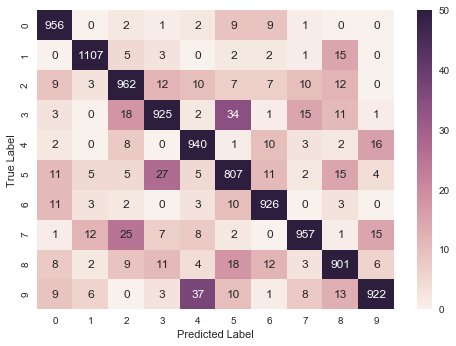

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# コンフュージョン・マトリックスを計算
cm = confusion_matrix(mnist.test.labels, pred)

# ヒートマップをプロット
sns.heatmap(cm, annot=True, fmt='d', vmin=0, vmax=50)
plt.xlabel(u'Predicted Label')
plt.ylabel(u'True Label')

(-0.5, 27.5, 27.5, -0.5)

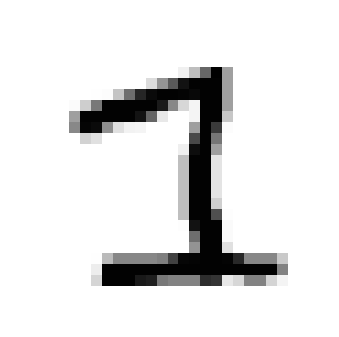

In [9]:
plt.matshow(mnist.test.images[3906].reshape(28, 28))
plt.axis('off')

In [8]:
# mnist.test.images[3906]を推論
classifier.predict(mnist.test.images[3906:3907])['classes']

array([3])